One of the most important results in the theory of neural networks is the universal approximation theorem. Informally, the universal approximation theorem states that any non-polynomial, continuous, real-valued activation function can be used to create a deep enough neural network that approximates (with arbitrarily high precision) any continuous real-valued function whose domain is compact.

Alternatively, the theorem guarantees that you can create some neural network to model any continuous real-valed function on a given closed interval of the real number line.

In this notebook we demonstrate the applicability of this theorem on synthetic data by comparing ANN’s to classical polynomial regression models in the 1D and 2D cases.

We hypothesize that the polynomial regression will outperform neural network with polynomial functions (by varying) but will be greatly outperformed for all non-polynomial functions. This would demonstrate the flexibility of neural networks, an advantage over classical polynomial regression due to their ability to fit to any type of function.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Normalization
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
scaler = MinMaxScaler()

# 1D Case

We use 10000 equally spaced points with a normally distributed noise as our inputs. We create several functions, apply them to the inputs, and scale everything so we can fit a neural network on them.

In [3]:
N = 100000
X = np.linspace(-5, 5, N)
noise = np.random.normal(0, 0.5, N)
noise = noise.reshape(-1,1)
X = X.reshape(-1,1)

np.random.seed(42)
a = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)
c = np.random.uniform(-1, 1)
d = np.random.uniform(-1, 1)
quadratic = lambda x: a * x**2 + b * x + c
y_quad = np.add(np.vectorize(quadratic)(X), noise)
y_quad = scaler.fit_transform(y_quad.reshape(-1,1))
cubic = lambda x: a * x**3 +  b * x**2 + c * x + d
y_cubic = np.add(np.vectorize(cubic)(X), noise)
y_cubic = scaler.fit_transform(y_cubic.reshape(-1,1))
expo = lambda x: np.piecewise(x, [x == 0, x != 0], [lambda t: 0, lambda t: np.exp(-1/(4*t**2))])
y_expo = np.add(np.vectorize(expo)(X), noise)
y_expo = scaler.fit_transform(y_expo.reshape(-1,1))

X = scaler.fit_transform(X)

The neural network we use has 10 hidden layers with 5 nodes each, uses the adam optimizer, and uses the ReLu activation function for every later (all these were experimentally determined to work well).

In [4]:
def nn(y, mse):
    adam = tf.keras.optimizers.Adam(learning_rate=0.05)
    BATCH_SIZE = 256
    net = Sequential()
    net.add(Dense(10, input_dim = 1, activation='relu'))
    net.add(Dense(5,  activation='relu'))
    net.add(Dense(5,  activation='relu'))
    net.add(Dense(5,  activation='relu'))
    net.add(Dense(5,  activation='relu'))
    net.add(Dense(5,  activation='relu'))
    net.add(Dense(5,  activation='relu'))
    net.add(Dense(5,  activation='relu'))
    net.add(Dense(5,  activation='relu'))
    net.add(Dense(1))
    net.compile(loss='mean_squared_error', optimizer='adam')
    net.fit(X, y, epochs = 100, batch_size = BATCH_SIZE)
    y_pred = net.predict(X)
    plt.plot(X, y)
    plt.plot(X, y_pred)
    print("Mean squared error:", mean_squared_error(y, y_pred))
    print("Neural network worse than linear regression by: ")
    print(mean_squared_error(y, y_pred)-mse)
    print((mean_squared_error(y, y_pred)-mse)/mse*100, "%")
    return

First, we fit a polynomial regression to a randomly generated quadratic function.

[0.1005994]
[[ 2.26804997 -1.66871777]]
0.0011013884367317506


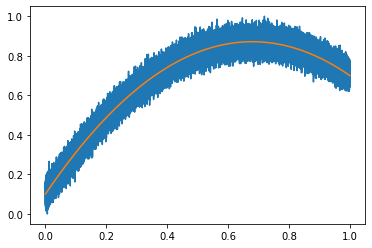

In [5]:
lm_quad = LinearRegression().fit(np.column_stack((X, X**2)), y_quad)
print(lm_quad.intercept_)
print(lm_quad.coef_)
y_quad_pred = lm_quad.intercept_ + (lm_quad.coef_[0, 0])*X + (lm_quad.coef_[0, 1])*X**2
plt.plot(X, y_quad)
plt.plot(X, y_quad_pred)
mse_quad = mean_squared_error(y_quad, y_quad_pred)
print(mse_quad)

Next, we fit the ANN

Epoch 1/100
391/391 [==============================] - 3s 3ms/step - loss: 0.0436
Epoch 2/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0026
Epoch 3/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 4/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 5/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 6/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 8/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 9/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 10/100
391/391 [==============================] - 2s 5ms/step - loss: 0.0011
Epoch 11/100
391/391 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 12/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 13/100


391/391 [==============================] - 1s 3ms/step - loss: 0.0011
Epoch 100/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0011
Mean squared error: 0.001139467266824454
Neural network worse than linear regression by: 
3.8078830092703325e-05
3.4573479094894144 %


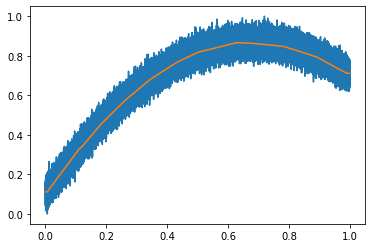

In [6]:
nn(y_quad, mse_quad)

It usually does worse by around 0-3% (using the mse metric), and it never outperforms polynomial regression (as expected).

Now, we fit a polynomial regression to a randomly generated cubic function.

[0.98441824]
[[-4.55797041  7.7680434  -4.17757911]]
6.910776465434124e-05


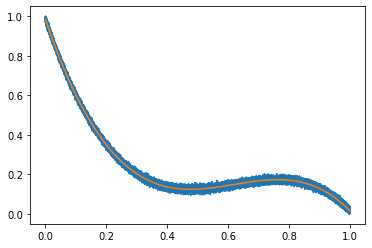

In [7]:
lm_cubic = LinearRegression().fit(np.column_stack((X, X**2, X**3)), y_cubic)
print(lm_cubic.intercept_)
print(lm_cubic.coef_)
y_cubic_pred = lm_cubic.intercept_ + (lm_cubic.coef_[0, 0])*X + (lm_cubic.coef_[0, 1])*X**2+ (lm_cubic.coef_[0,2])*X**3
plt.plot(X, y_cubic)
plt.plot(X, y_cubic_pred)
mse_cubic = mean_squared_error(y_cubic, y_cubic_pred)
print(mse_cubic)

Next we fit the neural network.

Epoch 1/100
391/391 [==============================] - 2s 3ms/step - loss: 0.0601
Epoch 2/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0441
Epoch 3/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0440
Epoch 4/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0440
Epoch 5/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0440
Epoch 6/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0440
Epoch 7/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0440
Epoch 8/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0440
Epoch 9/100
391/391 [==============================] - 2s 5ms/step - loss: 0.0440
Epoch 10/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0440
Epoch 11/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0440
Epoch 12/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0440
Epoch 13/100


391/391 [==============================] - 1s 3ms/step - loss: 0.0440
Epoch 100/100
391/391 [==============================] - 1s 2ms/step - loss: 0.0440
Mean squared error: 0.04402272119777825
Neural network worse than linear regression by: 
0.043953613433123914
63601.55570501847 %


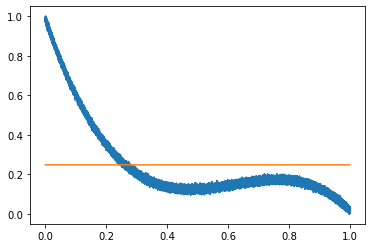

In [8]:
nn(y_cubic, mse_cubic)

Here, the neural network is usually worse by 60-70% in comparison to polynomial regression (much worse than with the quadratic function).

I hypothesize that this is because cubic regression is a more complex model than quadratic regression and thus produces a lower error for our artifical data.


Next, we use the function $$
y =  \begin{cases} 
      e^{\frac{-1}{x^2}} & x\neq 0 \\
      0 & x= 0 \\
   \end{cases}$$ (and then scale all inputs and outputs to be between 0 and 1).

[0.54041983]
[[ 1.16263954 -6.68625078 11.02252237 -5.49639387]]
0.01146265007928703


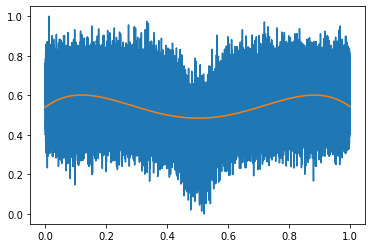

In [9]:
lm_expo = LinearRegression().fit(np.column_stack((X, X**2, X**3, X**4)), y_expo)
print(lm_expo.intercept_)
print(lm_expo.coef_)
y_expo_pred = lm_expo.intercept_ + (lm_expo.coef_[0, 0])*X + (lm_expo.coef_[0, 1])*X**2+ (lm_expo.coef_[0,2])*X**3 + (lm_expo.coef_[0,3])*X**4# + (lm_expo.coef_[0,4])*X**5# + (lm_expo.coef_[0,4])*X**5 + (lm_expo.coef_[0,3])*X**6# + (lm_expo.coef_[0,6])*X**7 + (lm_expo.coef_[0,7])*X**8
plt.plot(X, y_expo)
plt.plot(X, y_expo_pred)
mse_expo = mean_squared_error(y_expo, y_expo_pred)
print(mse_expo)

Epoch 1/100
391/391 [==============================] - 3s 3ms/step - loss: 0.0240
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 0.0116
Epoch 3/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0113
Epoch 4/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 5/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 6/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 7/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 8/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 9/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 10/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 11/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 12/100
391/391 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 13/100


391/391 [==============================] - 1s 4ms/step - loss: 0.0102
Epoch 100/100
391/391 [==============================] - 1s 4ms/step - loss: 0.0102
Mean squared error: 0.010176184449077481
Neural network worse than linear regression by: 
-0.0012864656302095483
-11.223108280468121 %


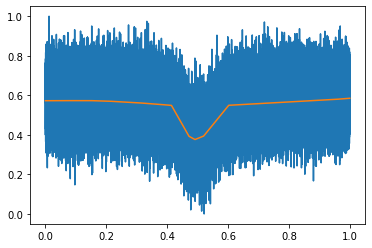

In [10]:
nn(y_expo, mse_expo)

Originally, this was done with $e^{\frac{-1}{x^2}}$ instead, and the NN was around 7% better than quartic regression with that. However, the graph wasn't as dramatic as I hoped, so I then tried $e^{\frac{-1}{4x^2}}$. With this, the neural network outperformed polynomial regression by 11-12%. We can also see that the neural network produces a much less natural, much more jagged looking graph than polynomial regression, reflecting the unique shape of our artificially generated data.

The more dramatic the curve is, the worse the quartic regression seems to do (while NN is around as good)

Any sort of polynomial regression above degree 4 results in a great amount of overfitting and leads to some wild results.

Increasing degree by 1 (to an odd power) doesn't do anything because the extra coefficient just becomes 0 (makes sense since we want a symmetric model)


# 2D Case

In [11]:
N2 = 1000
split = 27
X_1,X_2 = np.mgrid[-5:5:1000j, -5:5:1000j]
#print(X_1)
#print(X_2)
#X_1 = np.linspace(-5, 5, N2)
#X_2 = X_1
noise = np.random.normal(0, 0.5, N2**2)
noise = noise.reshape(-1,1)
X_1 = X_1.reshape(-1,1)
X_2 = X_2.reshape(-1,1)
#print(X_1)
#print(X_2)

np.random.seed(53)
a = np.random.uniform(-1, 1)
b = np.random.uniform(-1, 1)
c = np.random.uniform(-1, 1)
d = np.random.uniform(-1, 1)
e = np.random.uniform(-1, 1)
f = np.random.uniform(-1, 1)
saddle = lambda x_1, x_2: x_1**2 - x_2**2
parabaloid = lambda x_1, x_2: x_1**2 + x_2**2
cubic2 = lambda x_1, x_2: a * x_1**3 +  b * x_2**3 + c * x_1**2+ d * x_2**2 + e * x_1**2*x_2 + f * x_1*x_2**2
weird = lambda x_1, x_2: np.sin(np.sqrt(x_1**2 + x_2**2))

y_s = np.add(np.vectorize(saddle)(X_1, X_2), noise)
y_s = scaler.fit_transform(y_s.reshape(-1,1))
y_p = np.add(np.vectorize(parabaloid)(X_1, X_2), noise)
y_p = scaler.fit_transform(y_p.reshape(-1,1))
y_c = np.add(np.vectorize(cubic2)(X_1, X_2), noise)
y_c = scaler.fit_transform(y_c.reshape(-1,1))
y_w = np.add(np.vectorize(weird)(X_1, X_2), noise)
y_w = scaler.fit_transform(y_w.reshape(-1,1))

X_1 = scaler.fit_transform(X_1)
X_2 = scaler.fit_transform(X_2)

In [12]:
def nn2(y, mse):
    adam = tf.keras.optimizers.Adam(learning_rate=0.05)
    BATCH_SIZE = 256
    net = Sequential()
    #net.add(Dense(10, input_dim = 2, activation='relu'))
    #net.add(Dense(30,  activation='relu'))
    #net.add(Dense(50,  activation='relu'))
    #net.add(Dense(30,  activation='relu'))
    #try more layers, less units
    #net.add(Dense(1,activation='sigmoid'))
    net.add(Dense(10, input_dim = 2, activation='relu'))
    net.add(Dense(20,  activation='relu'))
    net.add(Dense(20,  activation='relu'))
    net.add(Dense(20,  activation='relu'))
    net.add(Dense(20,  activation='relu'))
    #net.add(Dense(10,  activation='relu'))
    #try more layers, less units
    net.add(Dense(1))
    net.compile(loss='mean_squared_error', optimizer='adam')
    net.fit(np.column_stack((X_1, X_2)), y, epochs = 50, batch_size = BATCH_SIZE)
    y_pred = net.predict(np.column_stack((X_1,X_2)))
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('z')
    ax.scatter3D(X_1[::int((N2/split)**2)], X_2[::int((N2/split)**2)], y[::int((N2/split)**2)])
    ax.scatter3D(X_1[::int((N2/split)**2)], X_2[::int((N2/split)**2)], y_pred[::int((N2/split)**2)])
    ax.view_init(15,60)
    print("Mean squared error:", mean_squared_error(y, y_pred))
    print("Neural network worse than linear regression by: ")
    print(mean_squared_error(y, y_pred)-mse)
    print((mean_squared_error(y, y_pred)-mse)/mse*100, "%")
    return

We first fit a function with a saddle point.

[0.49995576]
[[-1.88883748  1.88878801  1.88872505 -1.88873724]]
8.923004322267347e-05


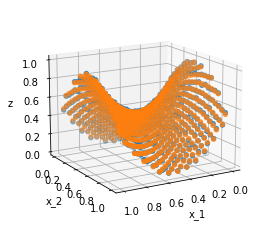

In [13]:
lm_s = LinearRegression().fit(np.column_stack((X_1, X_1**2, X_2, X_2**2)), y_s)
print(lm_s.intercept_)
print(lm_s.coef_)
y_s_pred = lm_s.intercept_ + (lm_s.coef_[0, 0])*X_1 + (lm_s.coef_[0, 1])*X_1**2+ (lm_s.coef_[0,2])*X_2 + (lm_s.coef_[0,3])*X_2**2

#V1, V2 = np.meshgrid(X_1, X_2)
#Z = saddle(V1, V2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('z')

ax.scatter3D(X_1[::int((N2/split)**2)], X_2[::int((N2/split)**2)], y_s[::int((N2/split)**2)])
ax.scatter3D(X_1[::int((N2/split)**2)], X_2[::int((N2/split)**2)], y_s_pred[::int((N2/split)**2)])
ax.view_init(15,60)

mse_s = mean_squared_error(y_s, y_s_pred)
print(mse_s)

Epoch 1/50
3907/3907 [==============================] - 15s 3ms/step - loss: 0.0024
Epoch 2/50
3907/3907 [==============================] - 17s 4ms/step - loss: 1.2473e-04
Epoch 3/50
3907/3907 [==============================] - 18s 5ms/step - loss: 1.1855e-04
Epoch 4/50
3907/3907 [==============================] - 18s 5ms/step - loss: 1.1501e-04
Epoch 5/50
3907/3907 [==============================] - 18s 4ms/step - loss: 1.1382e-04
Epoch 6/50
3907/3907 [==============================] - 17s 4ms/step - loss: 1.1290e-04
Epoch 7/50
3907/3907 [==============================] - 16s 4ms/step - loss: 1.1184e-04
Epoch 8/50
3907/3907 [==============================] - 17s 4ms/step - loss: 1.1125e-04
Epoch 9/50
3907/3907 [==============================] - 20s 5ms/step - loss: 1.1011e-04
Epoch 10/50
3907/3907 [==============================] - 20s 5ms/step - loss: 1.0931e-04
Epoch 11/50
3907/3907 [==============================] - 22s 6ms/step - loss: 1.0863e-04
Epoch 12/50
3907/3907 [===========

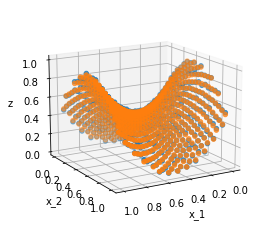

In [14]:
nn2(y_s, mse_s)

NN consistently does worse than polynomial regression here, by a larger margin than with the 1D case as well. Additionally the large fluctuation in the losses between  epochs mean that the results are inconsistent. This means that the network could potentially be improved with additional nodes in each layer, allowing it to capture more information.
The best performance of the neural net in relation to polynomial regression was a 15% decrease in error error, with sample size 1000, 3 hidden layers with 10-30-50-30-1 nodes, and 50 epochs. However, this neural network did not perform as well on latter functions.

Interestingly, it seems like linear regression did worse with increased sample size, although this could be just noise.

6 hidden layers, 10 nodes: 22.8% more error
4 hidden layers, 15 nodes: 19% more error
6 hidden layers, 15 nodes: 40% more error
5 hidden layers, 10 nodes: 15% more error
4 hidden layers, 10 nodes: 44% more error
10-20-20-20-20 hidden layers: 32% more error
After some further experimentation, we conclude that the amount of nodes does have to be sufficiently large in order to capture this function (as its dimension is higher). However, the effect of increasing the amount of nodes cannot always be reliably measured in each individual case.

In addition, computational time starts to become a huge issue with neural networks.

We now test with a parabaloid function, which has a similar structure to the saddle function (and should thus produce similar results).

[0.98185913]
[[-1.89464664  1.89459702 -1.89485178  1.89483955]]
8.97797449055551e-05


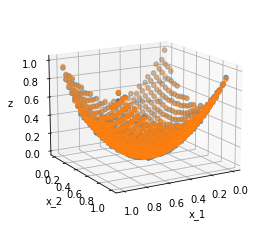

In [15]:
lm_p = LinearRegression().fit(np.column_stack((X_1, X_1**2, X_2, X_2**2)), y_p)
print(lm_p.intercept_)
print(lm_p.coef_)
y_p_pred = lm_p.intercept_ + (lm_p.coef_[0, 0])*X_1 + (lm_p.coef_[0, 1])*X_1**2+ (lm_p.coef_[0,2])*X_2 + (lm_p.coef_[0,3])*X_2**2

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('z')

ax.scatter3D(X_1[::int((N2/split)**2)], X_2[::int((N2/split)**2)], y_p[::int((N2/split)**2)])
ax.scatter3D(X_1[::int((N2/split)**2)], X_2[::int((N2/split)**2)], y_p_pred[::int((N2/split)**2)])
ax.view_init(15,60)

mse_p = mean_squared_error(y_p, y_p_pred)
print(mse_p)

In [ ]:
nn2(y_p, mse_p)

Epoch 1/50
3907/3907 [==============================] - 11s 2ms/step - loss: 0.0026
Epoch 2/50
3907/3907 [==============================] - 8s 2ms/step - loss: 1.3976e-04
Epoch 3/50
3907/3907 [==============================] - 8s 2ms/step - loss: 1.2720e-04
Epoch 4/50
3907/3907 [==============================] - 9s 2ms/step - loss: 1.2356e-04
Epoch 5/50
3907/3907 [==============================] - 8s 2ms/step - loss: 1.2091e-04
Epoch 6/50
3907/3907 [==============================] - 10s 2ms/step - loss: 1.1916e-04
Epoch 7/50
3907/3907 [==============================] - 9s 2ms/step - loss: 1.1793e-04
Epoch 8/50
3907/3907 [==============================] - 9s 2ms/step - loss: 1.1624e-04
Epoch 9/50
3907/3907 [==============================] - 9s 2ms/step - loss: 1.1549e-04
Epoch 10/50
3907/3907 [==============================] - 10s 3ms/step - loss: 1.1398e-04
Epoch 11/50
3907/3907 [==============================] - 12s 3ms/step - loss: 1.1424e-04
Epoch 12/50
3907/3907 [==================

Similar experimentation was done with this function, and similar results were found. There was again, a great deal of variance in the losses with even small changes in the neural network architecture.
10-20-20-20-20: 24% worse error

The non-polynomial fuctually we'll be using for the 2D case is $y = sin(\sqrt{x_1^2+x_2^2})$

In [ ]:
lm_w = LinearRegression().fit(np.column_stack((X_1, X_1**2, X_2, X_2**2)), y_w)
print(lm_w.intercept_)
print(lm_w.coef_)
y_w_pred = lm_w.intercept_ + (lm_w.coef_[0, 0])*X_1 + (lm_w.coef_[0, 1])*X_1**2+ (lm_w.coef_[0,2])*X_2 + (lm_w.coef_[0,3])*X_2**2

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('z')

ax.scatter3D(X_1[::int((N2/split)**2)], X_2[::int((N2/split)**2)], y_w[::int((N2/split)**2)])
ax.scatter3D(X_1[::int((N2/split)**2)], X_2[::int((N2/split)**2)], y_w_pred[::int((N2/split)**2)])
ax.view_init(15,60)

mse_w = mean_squared_error(y_w, y_w_pred)
print(mse_w)

In [ ]:
nn2(y_w, mse_w)

THE ANN here does SIGNIFICANTLY better than polynomial regression (more than a 50% drop in error w/ the some architectures).

EXTRA: We do some testing with a 2D cubic function.

In [ ]:
lm_c = LinearRegression().fit(np.column_stack((X_1**2, X_2**2, X_1**2*X_2, X_2**2*X_1, X_1**3, X_2**3)), y_c)
print(lm_c.intercept_)
print(lm_c.coef_)
y_c_pred = lm_c.intercept_ + (lm_c.coef_[0, 0])*X_1**2 + (lm_c.coef_[0, 1])*X_2**2+ (lm_c.coef_[0,2])*X_1**2*X_2 + (lm_c.coef_[0,3])*X_2**2*X_1\
    + (lm_c.coef_[0,4])*X_1**3 + (lm_c.coef_[0,5])*X_2**3
#V1, V2 = np.meshgrid(X_1, X_2)
#Z = saddle(V1, V2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('z')

ax.scatter3D(X_1[::int((N2/split)**2)], X_2[::int((N2/split)**2)], y_c[::int((N2/split)**2)])
ax.scatter3D(X_1[::int((N2/split)**2)], X_2[::int((N2/split)**2)], y_c_pred[::int((N2/split)**2)])
ax.view_init(15,60)

mse_c = mean_squared_error(y_c, y_c_pred)
print(mse_c)

In [ ]:
nn2(y_c, mse_c)